- Data Preparation
- Visualisation
- Create a Train and Test Set
- Create model
- Predictions
- Decision boundary
- How to use sk learn

## Data Generation
- x will be a vector of 2 dimensions (2 features)
- y will have value either 0 or 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1],[0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.2, 0.1],[0.1, 1.3]])

#it takes mean and covariance matrix and by default it gives 1 sample
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)

dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


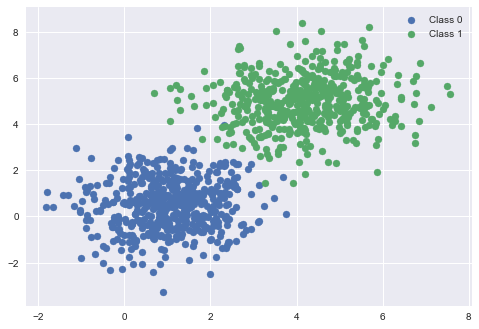

In [4]:
plt.style.use('seaborn')
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],label='Class 1')
plt.legend()
plt.show()

We want these data points in a matrix, 3 columns (2 of features and 1 of y), and then we will shuffle all data points (that's why we also need y in our data matrix becaus ecan't shuffle independently x and y)

In [5]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [6]:
#first 2 columns me features 
data[:500,:2] = dist_01
data[500:,:2] = dist_02

#first 500 were already 0, we overwrite other 500 as 1
data[500:,-1] = 1.0

In [7]:
#randomly shuffle data
np.random.shuffle(data)
print(data[:10])

[[ 5.40824204  6.56865058  1.        ]
 [ 1.53973427  5.19972713  1.        ]
 [ 1.61846702 -0.08412204  0.        ]
 [ 3.19326444  5.06098581  1.        ]
 [ 1.42610942  0.18694893  0.        ]
 [ 0.48508885  1.97120703  0.        ]
 [ 1.06255297  4.15489093  1.        ]
 [ 1.28976886  2.0319351   0.        ]
 [ 2.42571905  3.63551776  1.        ]
 [ 1.5135521   0.54632239  0.        ]]


In [8]:
#Divide the data into train and test part
split = int(0.8*data.shape[0])
X_train,Y_train = data[:split,:-1],data[:split,-1]

X_test,Y_test = data[split:,:-1],data[split:,-1]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


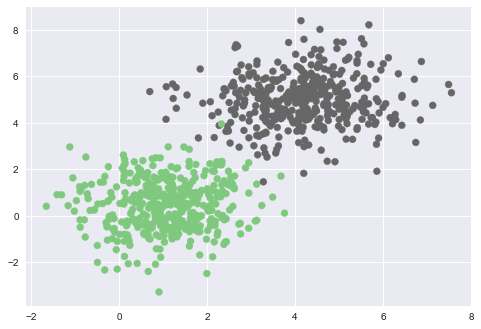

In [10]:
#one way is to run a for loop to check if a point is 1 or 0 and then give color, or provide a sequence to 'c' arguement
#[0 1 0 0 1 0 ] and this sequence is present in 'y' column
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [11]:
#Data Normalisation
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

#Apply transformation
X_train = (X_train - x_mean)/x_std

#Apply same transformation to  X_test, donot calculate separate values because we will calculate the line based upon training data
#we want to shift the data points with same amount as we shifted x_train so tht relative distribution doesnot get disturbed (it is possible that x_test will have differnet tmean)
X_test = (X_test - x_mean)/x_std
print(x_mean.shape,x_std.shape)

(2,) (2,)


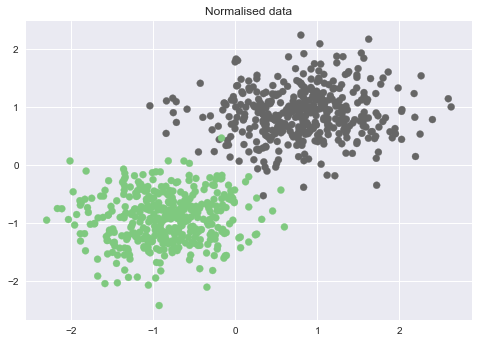

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.title('Normalised data')
plt.show()

- We can see all the data points are centered around 0,0

In [15]:
X_train.std(axis=0)

array([1., 1.])

## Implementation

In [16]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    """
    X - entire array (m,n+1)  extra 1 is a column of 1's to ease the multiplication
    theta - np.array(n+1,1)
    y - np.array(m,1)
    """
    #when we multiply theta and x, we get a vecotr of (m,1) we will apply sigmoid function to  each value in the vector
    return sigmoid(np.dot(X,theta))

In [17]:
sigmoid(100)

1.0

In [18]:
sigmoid(5)

0.9933071490757153

In [19]:
sigmoid(-20)
#close to zero

2.0611536181902037e-09

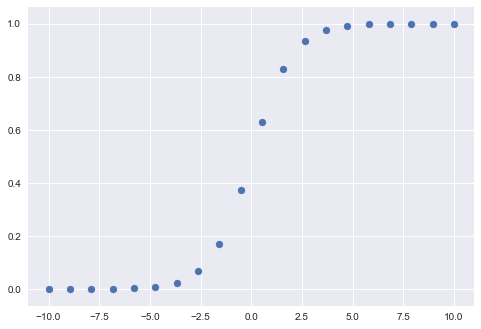

In [20]:
a = np.linspace(-10,10,20) # 20 equally spaced points between -10 and 10
plt.scatter(a,sigmoid(a))
plt.show()

- we have to return a scalar value (loss)
- y * hi + (1-y) * (1-hi) (we will do element wise multiplication) (hi is hypothesis values), this is a vector of (m,1) then we will take its sum and divide by 'm' (number of examples) or simply take mean of the vector

In [21]:
def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = y*np.log(hi) + (1 - y)*np.log((1 - hi))
    e = -1.0*(np.mean(e))
    return e

In [39]:
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y - hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,lr=0.5,max_steps=500):
    n = X.shape[1]
    theta = np.zeros((n,1))  # 0 means initially the line is x-axis
    error_list = []
    
    for i in range(max_steps):
        grad = gradient(X,y,theta)
        err = error(X,y,theta)
        error_list.append(err)
        
        theta = theta + lr*grad  #(either apply - on gradient and - between theta and lr*grad or use +)
        
    return theta,error_list

In [41]:
print(X_train.shape)
#Need to add extra columns of 1's
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones,X_train))
print(X_new_train.shape)

print(Y_train.shape)
Y_train = Y_train.reshape((-1,1)) #converting y to 800,1 because we need y as a column vector to multiply it in every step
print(Y_train.shape)

(800, 2)
(800, 3)
(800, 1)
(800, 1)


In [42]:
theta,error_list = gradient_descent(X_new_train,Y_train)

In [43]:
theta

array([[0.31007057],
       [3.11533471],
       [4.68818302]])

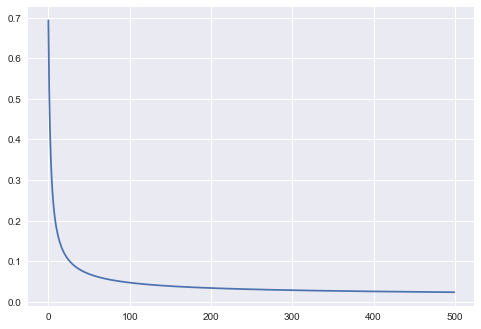

In [44]:
plt.plot(error_list)
plt.show()

### change the stopping criteria (optional)

In [50]:

def gradient_descent2(X,y,lr=0.5,max_steps=500):
    n = X.shape[1]
    theta = np.zeros((n,1))  
    error_list = []
    
    for i in range(max_steps):
        grad = gradient(X,y,theta)
        err = error(X,y,theta)
        error_list.append(err)
        prev_theta = theta
        theta = theta + lr*grad  
        updated_theta = theta
        if np.sum(updated_theta - prev_theta) <= 0.001:
            break
    return theta,error_list

In [51]:
theta2,error_list2 = gradient_descent2(X_new_train,Y_train)

In [52]:
theta2

array([[0.31007057],
       [3.11533471],
       [4.68818302]])

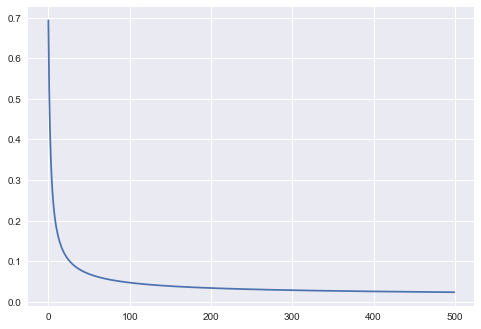

In [53]:
plt.plot(error_list2)
plt.show()

## Decision Boundary Visulaisation

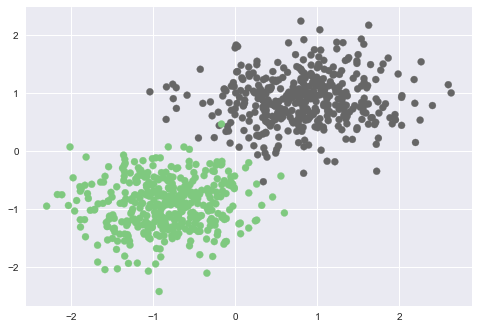

In [54]:
#need to reshape 'y' column because 'c' accepts sequence but we converted y  as  a column vector 
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.show()

In [55]:
#generate some data points in between -2 and 2
x1 = np.arange(-3,4)
print(x1)
x2 = -(theta[0] + theta[1]*x1)/theta[2]

[-3 -2 -1  0  1  2  3]


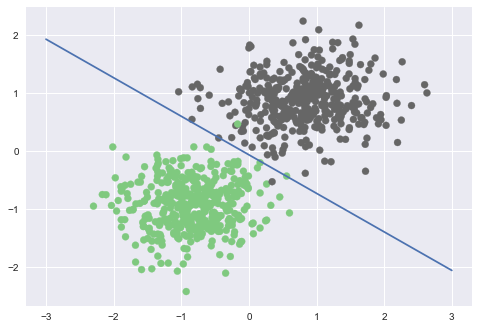

In [56]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

- It looks like the correct boundary that separates the two classes

## Prediction and Accuracy

In [59]:
ones = np.ones((X_test.shape[0],1))
X_new_test = np.hstack((ones,X_test))
print(X_new_test.shape)

(200, 3)


In [65]:
def predict(X,theta):
    h =  hypothesis(X,theta) #giving back our hypothesis
    output = np.zeros(h.shape)
    
    #print(h[:5,:]) # we will round off the values
    
    output[h >=0.5] = 1 #where predicted value is > 0.5 put 1 
    output = output.astype('int')
    
    return output
    

In [68]:
XT_preds = predict(X_new_train,theta)
Xt_preds = predict(X_new_test,theta)

print(XT_preds.shape)
print(Xt_preds.shape)

(800, 1)
(200, 1)


In [70]:
Y_test[:5]

array([0., 0., 0., 0., 0.])

In [71]:
def accuracy(actual,preds):
    
    actual = actual.astype('int') # because we had floating values in our y column
    actual = actual.reshape((-1,1)) #because pred has shape (200,1) of a vector
    
    acc = np.sum(actual == preds) # applying sum on boolean array, means true pe 1 add ho jaaega
    acc = acc/actual.shape[0] #dividing by total number of samples
    return acc*100

In [76]:
train_acc = accuracy(Y_train,XT_preds)
test_acc = accuracy(Y_test,Xt_preds)
print(train_acc)
print(test_acc)

99.5
99.0


## How to use sk learn ?

In [77]:
#linear because Logistic Regression(linear classifer) gives a line or a hyper plane, for non-linear we will see Neural Networks and  SVM
from sklearn.linear_model import LogisticRegression

In [78]:
#make an object of this class
model = LogisticRegression()

In [79]:
model.fit(X_train,Y_train)

C:\Users\vinee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
theta_0 = model.intercept_
theta_s = model.coef_

In [83]:
print(theta_0,theta_s)

[0.31466435] [[2.86223939 4.52735591]]


- These are close to the values what we have got earlier

In [84]:
model.score(X_train,Y_train)

0.9975

In [85]:
model.score(X_test,Y_test)

0.99

In [86]:
preds = model.predict(X_test)

In [87]:
preds.shape

(200,)

In [88]:
preds

array([0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.])